In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import model_selection, svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
all_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/roman_urdu_all_data.csv')
all_df = all_df.astype(str)
print(all_df.shape)
y = all_df['Label']
y = y.astype(float)
y = y.astype(int)
print(y.shape)

Mounted at /content/drive
(9526, 8)
(9526,)


In [ ]:
bow_converter = CountVectorizer()
bow_x = bow_converter.fit_transform(all_df['text'])
print(bow_x.shape)

(9526, 28606)


In [ ]:
tfidf_transform = TfidfTransformer(norm=None)
tfidf_x = tfidf_transform.fit_transform(bow_x)
print(tfidf_x.shape)

(9526, 28606)


In [ ]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.1 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=6ef04bf38feb05600f98320d4505abb29c2f9f0630ca1d0c4ba206c977aff039
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
pip install Py_FS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 1.3 MB/s 


In [ ]:
import Py_FS
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, y, test_size=0.33, random_state=42)
np_tfidf_x = tfidf_x.toarray()
np_y = y.to_numpy()

WHALE OPTIMIZATION ALGORITHM BASED WRAPPER

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8182296231633176
Number of Features: 6882
----------------------------------------

Whale 1 - Fitness: 0.8182296231633176, Number of Features: 6882
Whale 2 - Fitness: 0.8178132376927799, Number of Features: 10378
Whale 3 - Fitness: 0.8091367986184775, Number of Features: 11104
Whale 4 - Fitness: 0.8086919187698939, Number of Features: 14338
Whale 5 - Fitness: 0.8073683424378643, Number of Features: 15392
Whale 6 - Fitness: 0.8057358801516481, Number of Features: 14103
Whale 7 - Fitness: 0.8046600376398703, Number of Features: 13060
Whale 8 - Fitness: 0.8030426772272916, Number of Features: 10551
Whale 9 - Fitness: 0.8016495889920731, Number of Features: 15407
Whale 10 - Fitness: 0.7994105097155633, Number of Features: 13346
Whale 11 - Fitness: 0.7992505589747

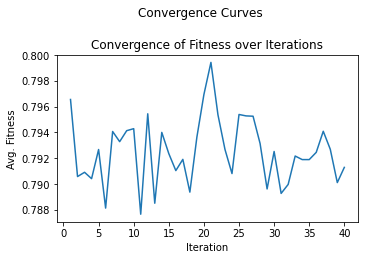

In [ ]:
solution_WOA = Py_FS.wrapper.nature_inspired.WOA(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


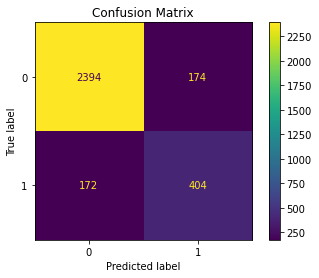

F1_score: {0: 0.9326061550447994, 1: 0.7001733102253033}
recall: {0: 0.9322429906542056, 1: 0.7013888888888888}
precision: {0: 0.9329696024941543, 1: 0.698961937716263}
accuracy: 0.8899491094147582


In [ ]:
res_WOA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_WOA.best_agent ,classifier='svm', save_conf_mat=False)
print(f'F1_score: {res_WOA.f1_score}')
print(f'recall: {res_WOA.recall}')
print(f'precision: {res_WOA.precision}')
print(f'accuracy: {res_WOA.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


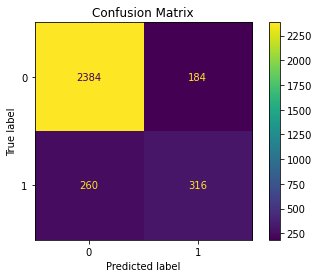

F1_score: {0: 0.9148119723714505, 1: 0.587360594795539}
recall: {0: 0.9283489096573209, 1: 0.5486111111111112}
precision: {0: 0.9016641452344932, 1: 0.632}
accuracy: 0.8587786259541985


In [ ]:
res_WOA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_WOA.best_agent ,classifier='knn', save_conf_mat=False)
print(f'F1_score: {res_WOA.f1_score}')
print(f'recall: {res_WOA.recall}')
print(f'precision: {res_WOA.precision}')
print(f'accuracy: {res_WOA.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


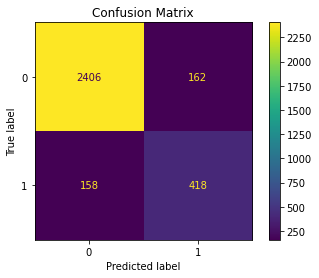

F1_score: {0: 0.9376461418550274, 1: 0.7231833910034602}
recall: {0: 0.9369158878504673, 1: 0.7256944444444444}
precision: {0: 0.9383775351014041, 1: 0.7206896551724138}
accuracy: 0.8982188295165394


In [ ]:
res_WOA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_WOA.best_agent ,classifier='rf', save_conf_mat=False)
print(f'F1_score: {res_WOA.f1_score}')
print(f'recall: {res_WOA.recall}')
print(f'precision: {res_WOA.precision}')
print(f'accuracy: {res_WOA.accuracy}')

**BASELINE MODEL**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


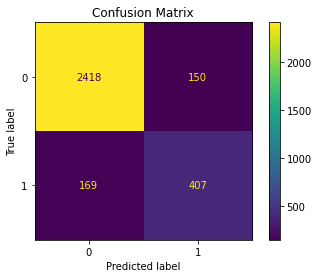

F1_score: {0: 0.9381183317167798, 1: 0.7184466019417476}
recall: {0: 0.9415887850467289, 1: 0.7065972222222222}
precision: {0: 0.9346733668341709, 1: 0.7307001795332136}
accuracy: 0.8985368956743003


In [ ]:
res_baseline = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='svm', save_conf_mat=False)
print(f'F1_score: {res_baseline.f1_score}')
print(f'recall: {res_baseline.recall}')
print(f'precision: {res_baseline.precision}')
print(f'accuracy: {res_baseline.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


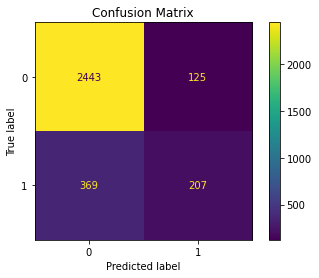

F1_score: {0: 0.90817843866171, 1: 0.45594713656387664}
recall: {0: 0.9513239875389408, 1: 0.359375}
precision: {0: 0.8687766714082503, 1: 0.6234939759036144}
accuracy: 0.8428753180661578


In [ ]:
res_baseline = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='knn', save_conf_mat=False)
print(f'F1_score: {res_baseline.f1_score}')
print(f'recall: {res_baseline.recall}')
print(f'precision: {res_baseline.precision}')
print(f'accuracy: {res_baseline.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


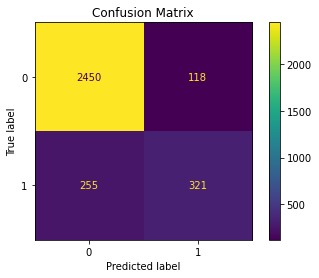

F1_score: {0: 0.9292622795372653, 1: 0.632512315270936}
recall: {0: 0.9540498442367601, 1: 0.5572916666666666}
precision: {0: 0.9057301293900185, 1: 0.7312072892938497}
accuracy: 0.8813613231552163


In [ ]:
res_baseline = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='rf', save_conf_mat=False)
print(f'F1_score: {res_baseline.f1_score}')
print(f'recall: {res_baseline.recall}')
print(f'precision: {res_baseline.precision}')
print(f'accuracy: {res_baseline.accuracy}')

**FILTER BASED EXPERIMENTATION**

In [ ]:
from sklearn.feature_selection import chi2
chi_result = {i: x for i, x in enumerate(chi2(np_tfidf_x, np_y)[0])}
chi_result_sorted = dict(sorted(chi_result.items(), key=lambda x: x[1], reverse=True))

print(len(chi_result_sorted))

28606


In [ ]:

# Find quartiles in terms of chi2 results
quartile = np.percentile(list(chi_result.values()), [25, 50, 75]) # Q1, Q2, Q3

print('Quartiles in terms Chi2 results', quartile)

Quartiles in terms Chi2 results [2.18942384 2.18942384 4.37884767]


In [ ]:
filterSol = []

for i, v in enumerate(chi_result.values()):
    if v >= quartile[1]:
        filterSol.append(i)

print(f"Selected Features: {len(filterSol)}")

Selected Features: 27603


In [ ]:
np_tfidf_x_temp = np_tfidf_x[:, filterSol]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np_tfidf_x_temp, np_y, train_size=0.67)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


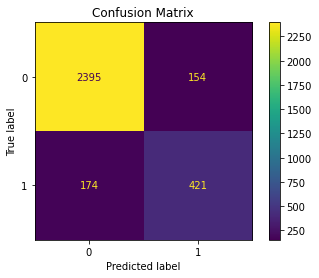

In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='svm', save_conf_mat=False)


In [ ]:
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')

F1_score: {0: 0.935912465806956, 1: 0.7196581196581195}
recall: {0: 0.9395841506473127, 1: 0.7075630252100841}
precision: {0: 0.9322693655118723, 1: 0.7321739130434782}
accuracy: 0.8956743002544529


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


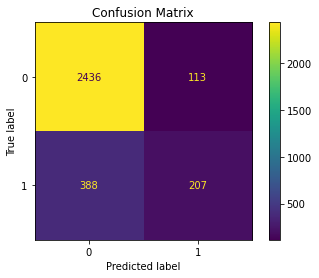

F1_score: {0: 0.906756002233389, 1: 0.4524590163934426}
recall: {0: 0.9556688897606904, 1: 0.34789915966386553}
precision: {0: 0.8626062322946175, 1: 0.646875}
accuracy: 0.8406488549618321


In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='knn', save_conf_mat=False)
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


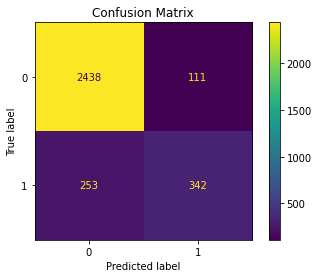

F1_score: {0: 0.9305343511450382, 1: 0.6526717557251908}
recall: {0: 0.9564535111808552, 1: 0.5747899159663865}
precision: {0: 0.905982905982906, 1: 0.7549668874172185}
accuracy: 0.8842239185750637


In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='rf', save_conf_mat=False)
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')

Correlation

In [ ]:
from sklearn.feature_selection import r_regression
np_tfidf_x = tfidf_x.toarray()
np_y = y.to_numpy()
corr_result = {i: x for i, x in enumerate(r_regression(np_tfidf_x, np_y))}
corr_result_sorted = dict(sorted(corr_result.items(), key=lambda x: x[1], reverse=True))

print(corr_result_sorted)

{5962: 0.4230891474951517, 21704: 0.28663355548398817, 14579: 0.23613217221865537, 16098: 0.18884906491340217, 12800: 0.1803865869909217, 10022: 0.17195346266872613, 15782: 0.16547873504217409, 9807: 0.1593119203890425, 9027: 0.15599772227192632, 4449: 0.13587033913220856, 9933: 0.1293000086434124, 5959: 0.12827126300289024, 14845: 0.1269334024794437, 14817: 0.11096412818377178, 14065: 0.10852427377530566, 20409: 0.10482083126372738, 4455: 0.097931166477199, 987: 0.09522303469768481, 20862: 0.09096778671731054, 18955: 0.08148355773923051, 20864: 0.08005918413546347, 11675: 0.07834607215005986, 12106: 0.07677012460628556, 10889: 0.07332172007517293, 15251: 0.06964692998217269, 3422: 0.06904173748072923, 14374: 0.0688706014289185, 14372: 0.0681865622589111, 10888: 0.06662424557975948, 22382: 0.06627888155105742, 20694: 0.06572719508062376, 10826: 0.06512305160009473, 9804: 0.06185036139430432, 15489: 0.06185036139430431, 3758: 0.06169657115116794, 2332: 0.061479989554339226, 9783: 0.0611

In [ ]:
# Find quartiles in terms of Correlation results
quartile = np.percentile(list(corr_result.values()), [25, 50, 75]) # Q1, Q2, Q3

print('Quartiles in terms of Correlation results', quartile)

Quartiles in terms of Correlation results [-0.00492704 -0.00492704 -0.00492704]


In [ ]:
# Find the features whose Correlation values are lower than the specified quartile value
filterSol = []

for i, v in enumerate(corr_result.values()):
    if v >= quartile[1]:
        filterSol.append(i)

print(f"Selected Features: {len(filterSol)}")

Selected Features: 21737


In [ ]:
# Find quartiles in terms of Correlation results
np_tfidf_x = np_tfidf_x[:, filterSol]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np_tfidf_x, np_y, train_size=0.67)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


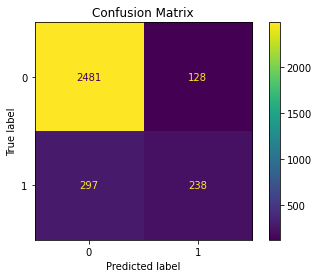

F1_score: {0: 0.9211063671802489, 1: 0.5283018867924527}
recall: {0: 0.9509390571100038, 1: 0.44485981308411215}
precision: {0: 0.8930885529157667, 1: 0.6502732240437158}
accuracy: 0.864821882951654


In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='svm', save_conf_mat=False)
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


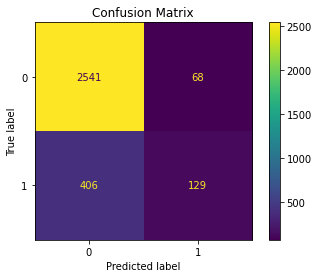

F1_score: {0: 0.9146868250539958, 1: 0.3524590163934426}
recall: {0: 0.9739363740896896, 1: 0.2411214953271028}
precision: {0: 0.8622327790973872, 1: 0.6548223350253807}
accuracy: 0.8492366412213741


In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='knn', save_conf_mat=False)
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


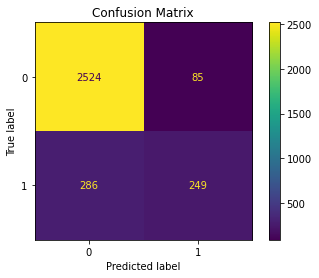

F1_score: {0: 0.9315371839822845, 1: 0.57307249712313}
recall: {0: 0.9674204676121119, 1: 0.4654205607476635}
precision: {0: 0.898220640569395, 1: 0.7455089820359282}
accuracy: 0.8819974554707379


In [ ]:
res = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, classifier='rf', save_conf_mat=False)
print(f'F1_score: {res.f1_score}')
print(f'recall: {res.recall}')
print(f'precision: {res.precision}')
print(f'accuracy: {res.accuracy}')